In [7]:
%matplotlib inline
import torch 
from torch import nn
import torchvision

device= 'cuda' if torch.cuda.is_available() else 'cpu'

## MNIST dataset

In [2]:
# https://nextjournal.com/gkoehler/pytorch-mnist
batch_size= 32

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('../datasets/mnist', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                                torchvision.transforms.Resize([32, 32]),
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../datasets/mnist', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                                torchvision.transforms.Resize([32, 32]),
                                torchvision.transforms.ToTensor(),
                                torchvision.transforms.Normalize(
                                 (0.5,), (0.5,))
                             ])),
  batch_size=16, shuffle=False, drop_last= True)

## Experiments

In [4]:
from modules.models import AE
import time


In [5]:
#import matplotlib.pyplot as plt
import numpy as np
from modules.train_utils import train

epochs = 20
show_results_epoch= 10
device = 'cuda:0'

criterion = nn.L1Loss().to(device)
train_loader= train_loader
test_loader= test_loader

/n/n **************** use_resnet : False | latent_dim : 64 | train_encoder : True *****************
Initializing LinearCNNEncoder : number of blocks : 5
Initializing DeepCNNDecoder : number of blocks : 5
device : cuda
freeze Encoder : False


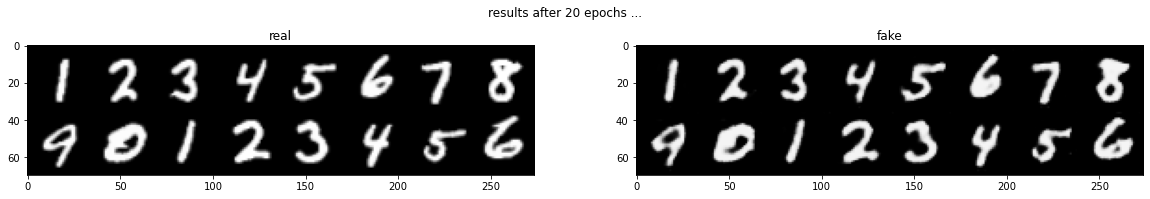

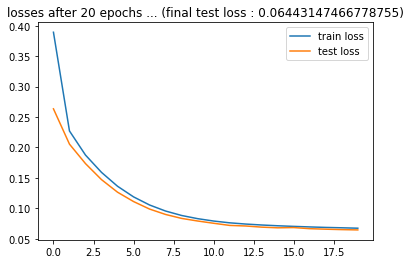

executation time : 499.43509817123413 sec
/n/n **************** use_resnet : False | latent_dim : 64 | train_encoder : False *****************
Initializing LinearCNNEncoder : number of blocks : 5
Initializing DeepCNNDecoder : number of blocks : 5
device : cuda
freeze Encoder : True


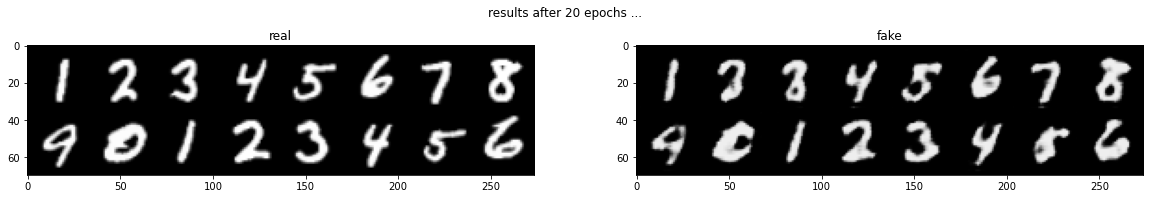

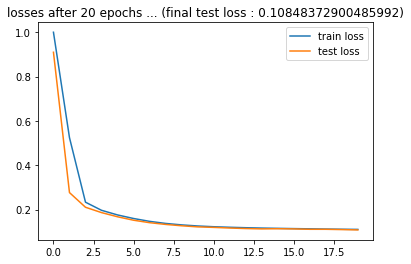

executation time : 430.699049949646 sec
/n/n **************** use_resnet : True | latent_dim : 64 | train_encoder : True *****************
Initializing LinearCNNEncoder : number of blocks : 5
Initializing DeepCNNDecoder : number of blocks : 5
device : cuda
freeze Encoder : False


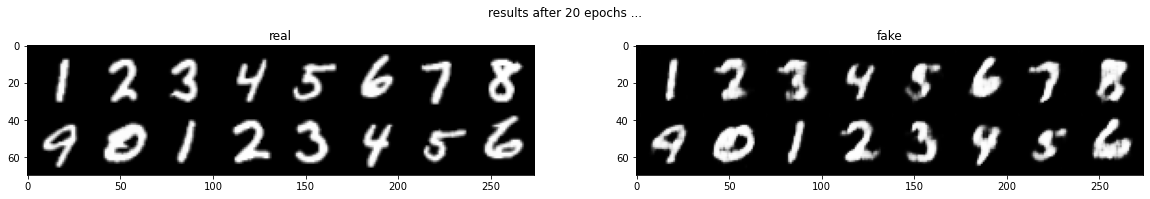

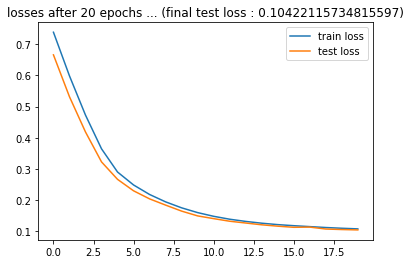

executation time : 1221.2691056728363 sec
/n/n **************** use_resnet : True | latent_dim : 64 | train_encoder : False *****************
Initializing LinearCNNEncoder : number of blocks : 5
Initializing DeepCNNDecoder : number of blocks : 5
device : cuda
freeze Encoder : True


In [ ]:
epochs = 20
show_results_epoch= 20
for latent_dim in [64, 32, 10, 5, 3, 2, 1]:
    for use_resnet in [False, True]:
        for train_encoder in [True, False]:
            print(f'/n/n **************** use_resnet : {use_resnet} | latent_dim : {latent_dim} | train_encoder : {train_encoder} *****************')
            model = AE(latent_dim, use_resnet).to(device)
            opt = torch.optim.Adam(model.parameters(), lr=0.0001)
            start= time.time()
            train(model=model, criterion=criterion, opt=opt, train_loader=train_loader, test_loader=test_loader, device= device, latent_dim=latent_dim, epochs=epochs, show_results_epoch=show_results_epoch, train_encoder= train_encoder)
            end= time.time()
            print(f'executation time : {end-start} sec')